In [47]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import random

In [22]:
mut_alleles = pd.read_csv('../data_obtain/allel_mutspec_12comp.csv', index_col = 0)

In [23]:
mut_alleles.head()

,allel,n_subtree,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations
0,5161Ser,0,0.008204,0.069156,0.014245,0.007952,0.002325,0.365963,0.070945,0.002271,0.040595,0.013497,0.368526,0.036321,369947
0,5161Ser,1,0.000000,0.059908,0.023041,0.000000,0.000000,0.400922,0.050691,0.000000,0.023041,0.018433,0.396313,0.027650,217
0,4825Gly,0,0.008198,0.069148,0.014248,0.007947,0.002323,0.365978,0.070930,0.002269,0.040589,0.013500,0.368546,0.036324,370222
0,4499Ile,0,0.008201,0.069139,0.014254,0.007950,0.002324,0.365986,0.070939,0.002267,0.040602,0.013497,0.368512,0.036330,370080
0,4477Glu,0,0.008187,0.069166,0.014248,0.007950,0.002324,0.365950,0.070949,0.002270,0.040575,0.013500,0.368558,0.036324,370083


In [24]:
mut_alleles['al_stnum'] = mut_alleles['allel'].astype(str) + '_' + mut_alleles['n_subtree'].astype(str)

## Hierarchical clustering

In [25]:
df_for_dendro = mut_alleles.drop(['allel', 'n_subtree', 'sum_mutations'],axis=1)

In [26]:
df_for_dendro.head()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
0,0.008204,0.069156,0.014245,0.007952,0.002325,0.365963,0.070945,0.002271,0.040595,0.013497,0.368526,0.036321,5161Ser_0
0,0.000000,0.059908,0.023041,0.000000,0.000000,0.400922,0.050691,0.000000,0.023041,0.018433,0.396313,0.027650,5161Ser_1
0,0.008198,0.069148,0.014248,0.007947,0.002323,0.365978,0.070930,0.002269,0.040589,0.013500,0.368546,0.036324,4825Gly_0
0,0.008201,0.069139,0.014254,0.007950,0.002324,0.365986,0.070939,0.002267,0.040602,0.013497,0.368512,0.036330,4499Ile_0
0,0.008187,0.069166,0.014248,0.007950,0.002324,0.365950,0.070949,0.002270,0.040575,0.013500,0.368558,0.036324,4477Glu_0


In [27]:
varieties = list(df_for_dendro.pop('al_stnum'))
samples = df_for_dendro.values

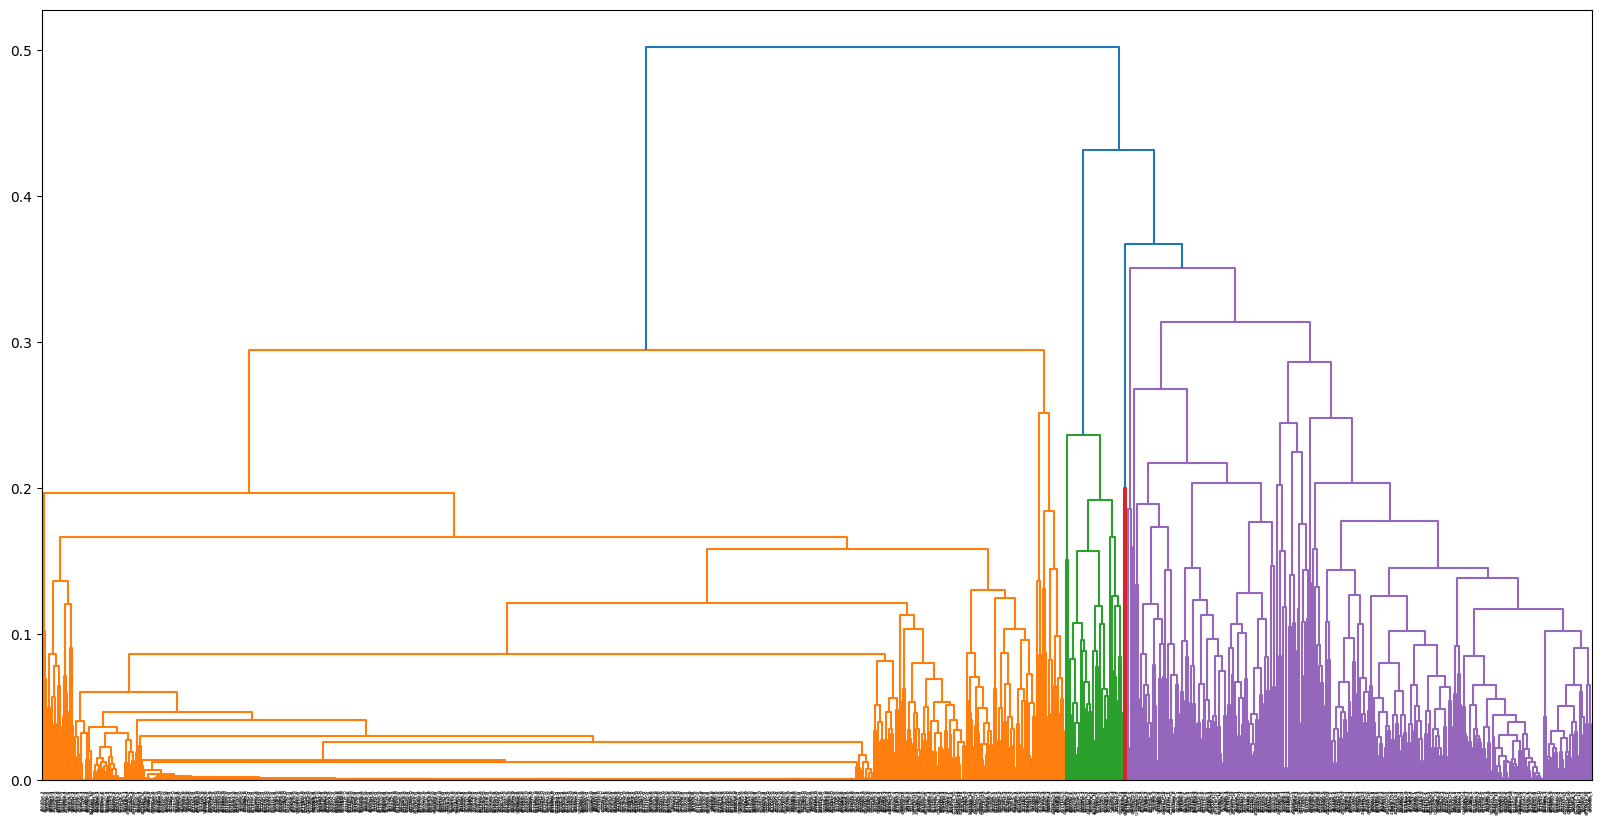

In [28]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')
plt.figure(figsize=(20,10))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=3,
           )

plt.show()
plt.close()

## KMEANS without teacher

In [57]:
df_for_dendro = mut_alleles.drop(['allel', 'n_subtree', 'sum_mutations'],axis=1)
data = df_for_dendro.drop('al_stnum',axis=1)
pca = PCA()
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.403 0.264 0.146 0.054 0.046 0.040 0.021 0.009 0.008 0.006 0.003 0.000


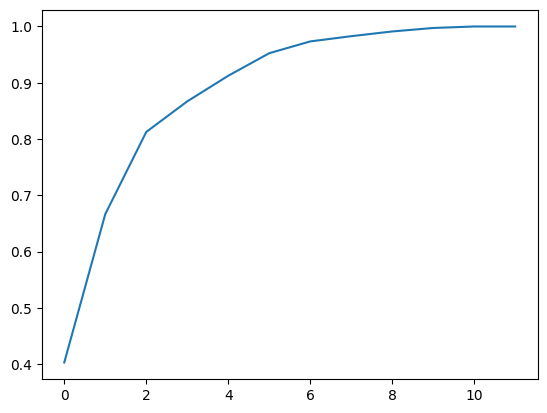

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Может быть объяснено примерно 4 компонентами

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

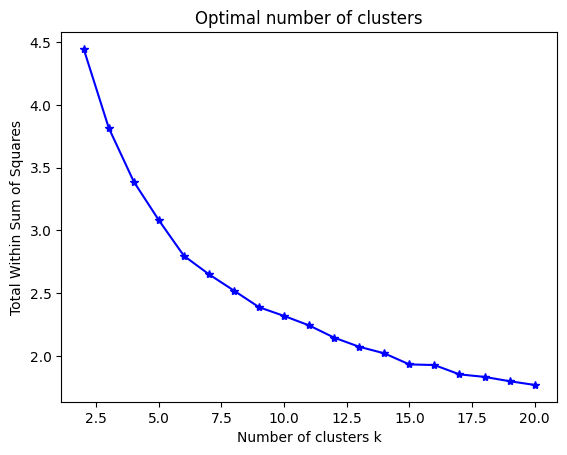

In [64]:
wss = []

K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

In [65]:
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(data) 
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [66]:
find_optimal_cluster_number_kmeans(data, 2, 20, random_state=123)

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

n_clusters = 2 The average silhouette_score is : 0.5487


### Take n_clusters as 2

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


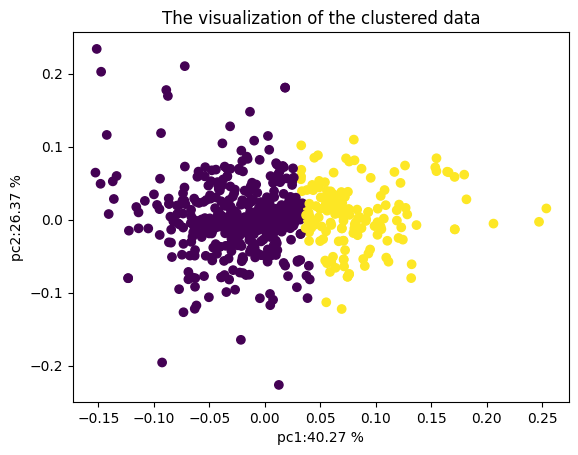

In [62]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=2, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


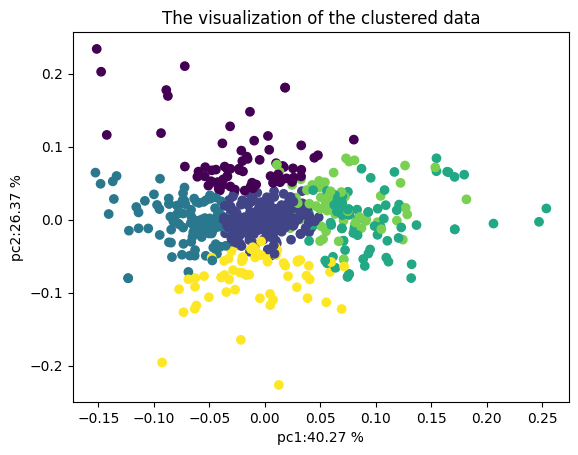

In [67]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=6, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

## DBSCAN

In [70]:
epsilon = np.arange(0.01,0.12,0.01)
min_samples = [4,5,6,7,8,9,10,15,20,25]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(data)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = metrics.silhouette_score(data, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.11 
min_sample= 8 
number of clusters= 1 
average silhouette score= 0.7267


In [71]:
db = DBSCAN(eps=0.11, min_samples=8).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 13
Silhouette Coefficient: 0.727


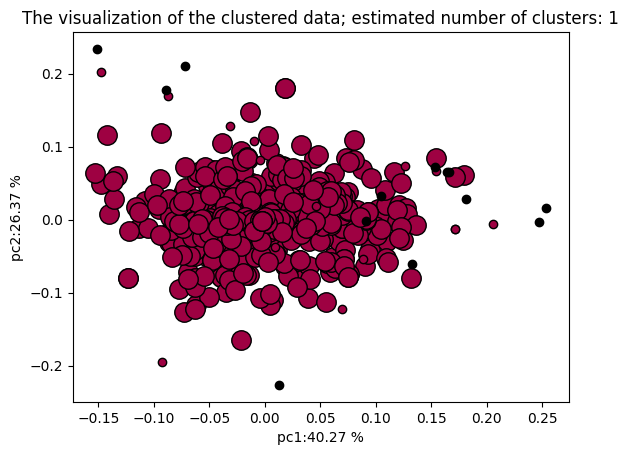

In [72]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()